In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns


In [91]:
df_states = pd.read_csv('complete.csv')
df_states.head()
patient_df = pd.read_csv('patients_data.csv')
patient_df.head()

,patient_number,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,current_status,...,suspected_contacted_patient,nationality,type_of_transmission,status_change_date,source_1,source_2,source_3,backup_notes,Unnamed: 19,Unnamed: 20
0,1,KL-TS-P1,30/01/2020,20.0,F,Thrissur,Thrissur,Kerala,KL,Recovered,...,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN
1,2,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,Recovered,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN
2,3,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,Recovered,...,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN
3,4,DL-P1,02/03/2020,45.0,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,...,NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,NaN,NaN
4,5,TS-P1,02/03/2020,24.0,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,...,NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",NaN,NaN


# State-wise visualisation of patients 

In [92]:
states = df_states[['Name of State / UT','Total Confirmed cases']].drop_duplicates(subset='Name of State / UT')
state_codes = patient_df[['state_code']].drop_duplicates(subset='state_code')

In [93]:
def dict_val_zero(data_frame,col_name):
  '''To make the dictionary of a column of a Data Frame and set the values of the ditcionary to 0'''
  data_dict = dict(data_frame[col_name])
  n_dict={}
  for k,v in data_dict.items():
    n_dict[v] = 0
  return n_dict
new_dict = dict_val_zero(states,'Name of State / UT')


In [94]:
def key_to_value(data_frame,col_name):
  '''This function converts a Data Frame column into a dictionary with its index
  as a key and column value as the value of the key in dictionary'''
  df_dict = dict(data_frame[column_name])
  dic = {}
  for k,v in df_dict.items():
    dic[v] = k
  return dic

In [95]:
df_states = df_states[['Name of State / UT','Total Confirmed cases']]
for k,v in new_dict.items():
  new_dict[k] = max(df_states['Total Confirmed cases'][df_states['Name of State / UT'].eq(k)])
new_dict
type(df_states)
state_names = list(new_dict.keys())
active_cases = list(new_dict.values())

In [96]:
pdd = pd.DataFrame(state_names,active_cases)
l = pdd.index
col = []
for i in l:
    if(i>400):
        col.append('red')
    elif(i>300):
        col.append('orange')
    elif(i>200):
        col.append('yellow')
    elif(i>100):
        col.append('blue')
    else:
        col.append('green')

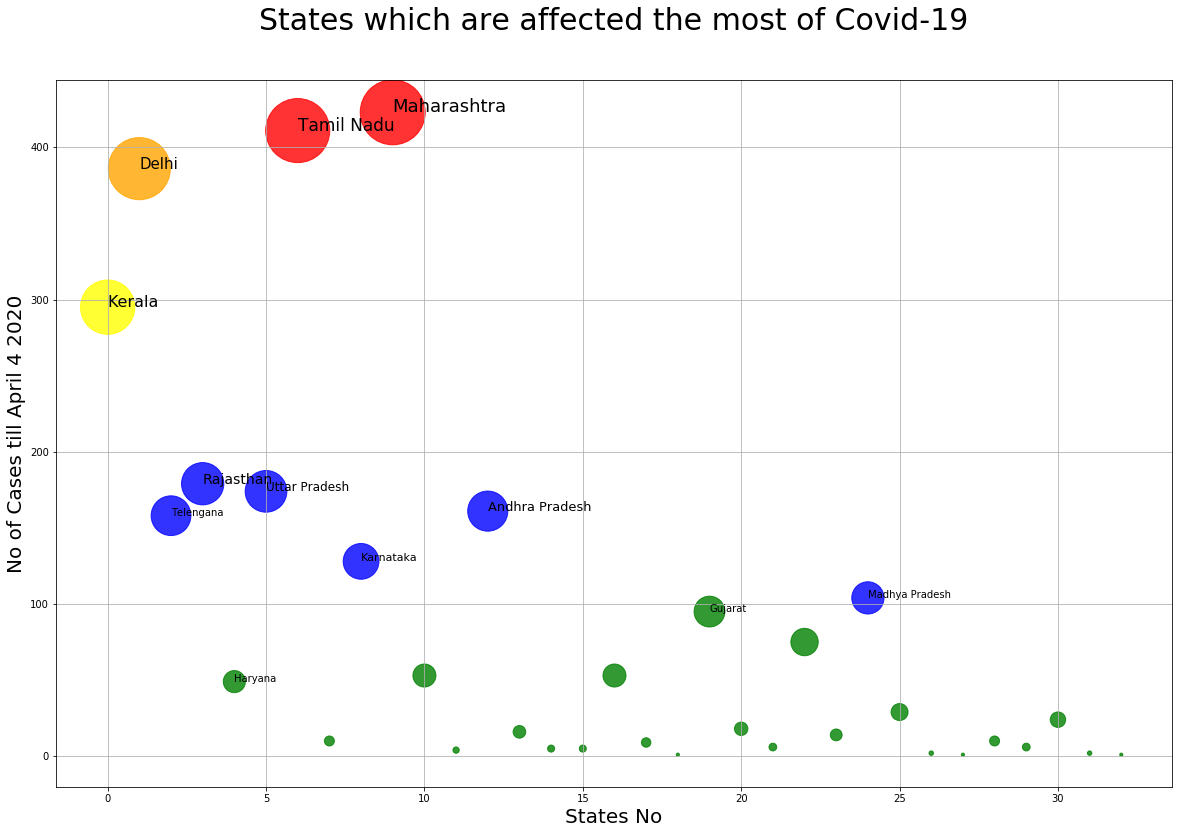

In [97]:
plt.figure(figsize=(20,13))
plt.scatter(state_names,active_cases, s=np.array(active_cases)*10, alpha=0.8,c=col)
plt.xscale('linear')
plt.title('States which are affected the most of Covid-19',fontsize=30,pad=50.0)
plt.ylabel('No of Cases till April 4 2020',fontsize=20)
plt.xlabel('States No',fontsize=20)
plt.grid(True)
plt.text('Maharashtra',423,'Maharashtra',fontsize=18)
plt.text('Tamil Nadu',411,'Tamil Nadu',fontsize=17)
plt.text('Kerala',295,'Kerala',fontsize=16)
plt.text('Delhi',386,'Delhi',fontsize=15)
plt.text('Rajasthan',179,'Rajasthan',fontsize=14)
plt.text('Andhra Pradesh',161,'Andhra Pradesh',fontsize=13)
plt.text('Uttar Pradesh',174,'Uttar Pradesh',fontsize=12)
plt.text('Karnataka',128,'Karnataka',fontsize=11)
plt.text('Madhya Pradesh',104,'Madhya Pradesh',fontsize=10)
plt.text('Telengana',158,'Telengana')
plt.text('Gujarat',95,'Gujarat')
plt.text('Haryana',49,'Haryana')
plt.show()



# Comparison of Gender and Age Ratio of patients

In [98]:
gender = patient_df[['gender','age_bracket']].dropna()
gender.reset_index(inplace=True,drop=True)

In [99]:
male = gender[gender['gender'].eq('M')]
female = gender[gender['gender'].eq('F')]


In [107]:
m = []
for i in s_male:
    m.append(int(i))
s_male = sorted(m)
f= []
for i in s_female:
    f.append(int(i))
s_female = sorted(f)

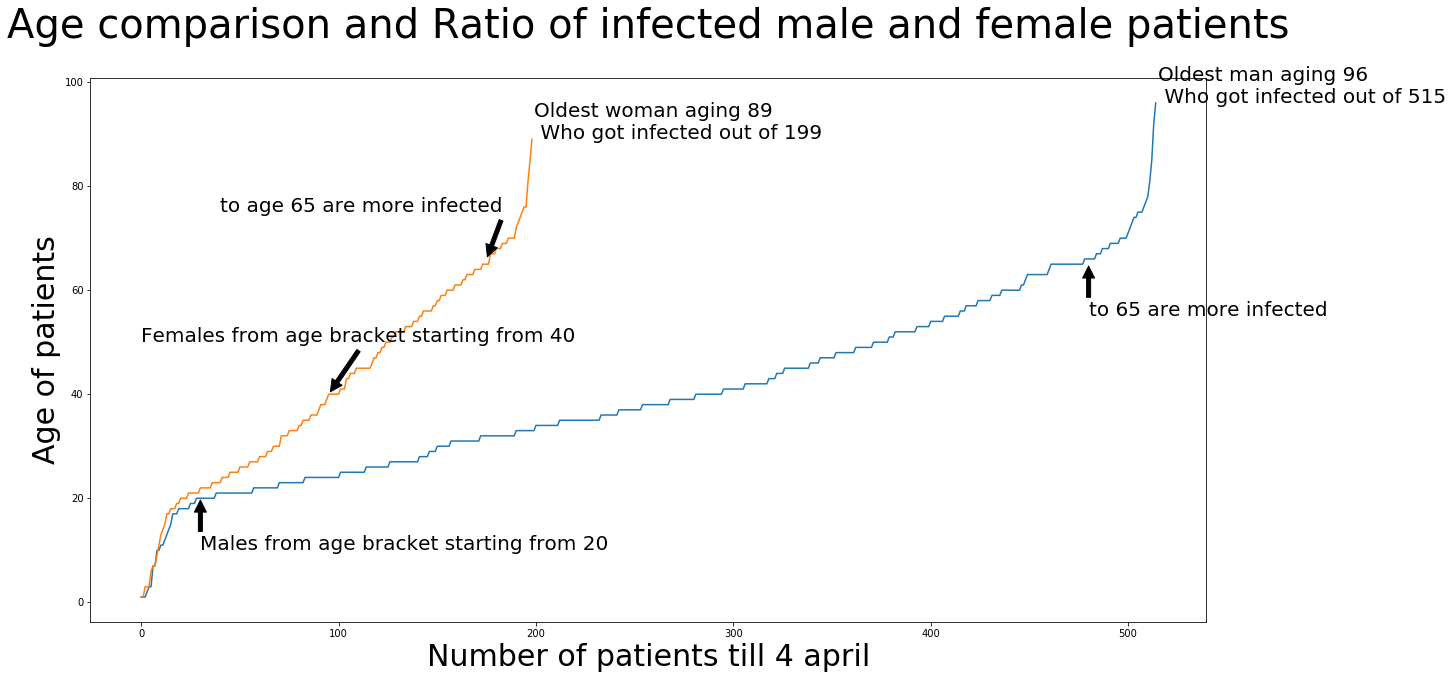

In [145]:

plt.figure(figsize=(20,10))
plt.plot(range(515),s_male)
plt.plot(range(199),s_female)
plt.title('Age comparison and Ratio of infected male and female patients',fontsize=40,pad=40.0)
plt.xlabel('Number of patients till 4 april',fontsize=30)
plt.ylabel('Age of patients',fontsize=30)
plt.text(515,96,'Oldest man aging 96 \n Who got infected out of 515',fontsize=20)
plt.text(199,89,'Oldest woman aging 89 \n Who got infected out of 199',fontsize=20)
plt.annotate('Males from age bracket starting from 20 ',xy=(30,20),xytext=(30,10),arrowprops=dict(facecolor='black',shrink=0.05),fontsize=20)
plt.annotate('to 65 are more infected',xy=(480,65),xytext=(480,55),arrowprops=dict(facecolor='black',shrink=0.05),fontsize=20)
plt.annotate('Females from age bracket starting from 40 ',xy=(95,40),xytext=(0,50),arrowprops=dict(facecolor='black',shrink=0.05),fontsize=20)
plt.annotate('to age 65 are more infected',xy=(175,66),xytext=(40,75),arrowprops=dict(facecolor='black',shrink=0.05),fontsize=20)
plt.show()